# Introduction to Digital Forensics for cybercrime
#### Assignment 1

**Group 5**<br/>
Fatema Alammal s2058502<br/>
Ellen Wittingen s2095610<br/>
Anniek Megens s1982869<br/>
Jelte van Bommel s2136074<br/>
Denis Arva s2188511<br/>
Joel Tyhaar s2138603<br/>


## Motivation and Goals
For this assignment we’ve chosen the black market Silk Road (accessed at: http://silkroad7rn2puhj.onion).


The name The Silk Road is an homage to the historic network of traders and routes between Europe, India and China around 130BC - 1452 A.D. [1.](https://www.history.com/topics/ancient-middle-east/silk-road#:~:text=Established%20when%20the%20Han%20Dynasty,with%20China%20and%20closed%20them.) The dark web marketplace The Silk Road was created by Ross William Ulbricht and was the first of its kind. We have chosen The Silk Road to gather our information, due to its infamousness even for people that are rather unfamiliar with the dark web. It has a long history and is frequently forced to shut down, but comes back online over and over again. On Ulbricht’s LinkedIn profile he stated: “I am creating an economic simulation to give people a first-hand experience of what it would be like to live in a world without the systemic use of force.” [2](https://www.linkedin.com/in/rossulbricht/). We think that this sounds like a purpose with very good intent and thus we want to investigate the items sold on the market. We expect to find a lot of illegal objects and services and want to confirm this by gathering a dataset of 100 items and order them according to their illegality and pose a threat for other human beings. This will allow us to come to a conclusion about Ulbricht's idea of having a market with no control of systematic force, and may give advice to authorities on which sellers are offering seriously threatening deals like assasination services or human trafficking or child abduction.


## Methodology
### Collecting 100 samples in detail
The way in which we looked for posts was to first assign a category of things to each project member, for example drugs and weapons. After that we just looked for things that seemed interesting, by typing in search queries or looking at what people from different countries are selling/shipping. These posts were then classified into different categories: Legality, category of goods, feedback, number of posts, and where the products were being shipped from. Legality of the products were categorized as “Legal”, “Illegal” and “Depends”. To determine this, we mostly looked at what is considered legal or illegal in the Netherlands. 

It was chosen to only classify the sellers by the number of positive feedbacks and amount of posts of items being sold. However the amount of post might give a skewed image of the amount of goods being sold in its entirety of the market, as for example the selling of eBooks is done by a lot less sellers than the selling of drugs. It was opted not to further analyze the price range of the products being sold. This being that there are a multitude of different categories and types of products being sold, this makes it hard to compare the price range between, for example, books and drugs.Secondly, we determined the top 10 sellers from the posts we have chosen and from SilkRoad based on the positive feedback they have. Thirdly, we chose our top three most surprising posts and three sellers that should be investigated by the police. 

### Scraping TOR
Because we analyzed a small dataset of 100 listings, which might not even represent the Silk Road that well, we opted to automate the scraping of the Silk Road and analyze the scraped information. It was necessary to automate this since the Silk Road has been around for many years and the amount of listings has become too large to manually process. The scraping was automated in Python, and used the TOR application as a SOCKS proxy to access the dark web. When a SOCKS proxy is being used, we can use the regular Python ```requests``` library to facilitate our ```GET``` and ```POST``` requests to the Silk Road servers. We analyze the HTML of each listing overview page using Beautiful Soup, to retrieve the data of 11 listings per page.This data was then saved to a CSV file. We quite soon discovered that it was gonna take weeks to scrape. In order to increase the performance we multi-threaded the scraping. Our final scraping code is attached in appendix B. We call this dataset the 'large dataset'.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the data from our CSV file into a pandas dataframe
df = pd.read_csv("scraped.csv") 
# Preview some properties from the dataset
print("There are {} listings and {} features in this dataset.".format(df.shape[0], df.shape[1]))
print("There are {} categories, for example: {}...".format(len(df.Category.unique()), ", ".join(df.Category.unique()[0:5])))
print("There are {} countries that are being shipped from such as {}... ".format(len(df.Ships_From.unique()), ", ".join(df.Ships_From.unique()[0:5])))
print("There are {} sellers such as {}... ".format(len(df.Seller_Name.unique()), ", ".join(df.Seller_Name.unique()[0:5])))
df.head()

There are 46998 listings and 16 features in this dataset.
There are 43 categories, for example: Services, Cocaine, Weed, Concentrates, Others...
There are 1012 countries that are being shipped from such as USA, TOR, Tor land, United Kingdom, Netherlands... 
There are 3143 sellers such as probitexchange, CharlieUKontor, Amsterdam2015, kingofcannabis, waxthtazz... 


,Payment,Highly_Sold,Link,Title,Dollars,BTC,Seller_Name,Feedback_Positive,Feedback_Negative,Feedback_Percentage,Seller_Level,Category,Ships_From,PGP_Verified,Silk_Road_League,Page
0,ESCROW,True,?listing=6qMJc9QHNPxUCkD29U1TRAb6qk4Zwg1sMB1pA...,SEP. 4th UPDATE - 39 BARS LEFT! 1 OZ Pamp REAL...,900.0,0.084218,probitexchange,1383,35,98.0,Level 2,Services,USA,True,False,0
1,ESCROW,True,?listing=1BY23qedZ6Y1Rh06D8uCaKchWxSOtqcjr1Zjf...,Carding Cashing out Fax number METHOD FOR A...,5.0,0.000468,probitexchange,1383,35,98.0,Level 2,Services,USA,True,False,0
2,ESCROW,True,?listing=8qDsJatjn0sqgQTWTdBjaz6pvADbGd2EJ6wSV...,NEW WORKING METHOD FOR Carding apple store APP...,3.0,0.000281,probitexchange,1383,35,98.0,Level 2,Services,USA,True,False,0
3,ESCROW,False,?listing=YDwfK4cWgCjBXNwEE7wsdBjvjsBHQbRofCJq6...,IMPORTANT FOR CARDERS BOTH N00BS AND PROS Anti...,3.0,0.000281,probitexchange,1383,35,98.0,Level 2,Services,USA,True,False,0
4,ESCROW,True,?listing=O78XuDPQRkwsScM80psyfXUXCbEakeWxbTKKW...,2016 BESTBUY CARDING TUTORIAL Amazon Tutorial...,9.0,0.000842,probitexchange,1383,35,98.0,Level 2,Services,USA,True,False,0



####  Removing discrepencies from the data
Since the large dataset contains a lot of handwritten entries, typo's and other differences between spelling are bound to happen in certain columns. The main column for which this is an issue is the 'Ships From' column, since we want to analyze the dataset using the shipping origin. Additionally there are a few entries in the dataset which are very unrealistic and will be removed as to not skew the analysis too much.

For example: there is one user that has a negative feedback of 1000000079. This is not a scraping mistake and can be manually verified on the Silk Road. It appears a moderator manually awarded this negative feedback, or the database has some corruption.


In [2]:
df.sort_values("Feedback_Negative",ascending=False)[:4]

,Payment,Highly_Sold,Link,Title,Dollars,BTC,Seller_Name,Feedback_Positive,Feedback_Negative,Feedback_Percentage,Seller_Level,Category,Ships_From,PGP_Verified,Silk_Road_League,Page
22861,FE,True,?listing=4BBbYWS0JhfYd1N50jKRWXve62YpN4HF5KhSf...,25x LSD tabs 160 ug Buddha,98.0,0.009227,bambanogat,3726,1000000079,0.0,Level 3,LSD,Worldwide,True,False,2076
22931,FE,True,?listing=hhj8zaS9hd1KkjzHM9Rpjx2U9n1Rq3hOZFKPf...,â˜…â˜… 1g King of MDMA cristals 84% pure SAMPL...,17.0,0.001598,bambanogat,3726,1000000079,0.0,Level 3,MDMA,Worldwide,True,False,2082
10541,FE,True,?listing=ev9Q8ymjHWdZ19tt0aCYCdrBJjOvqtWJcVZZH...,50x LSD 300 ug HQ,280.0,0.026152,bambanogat,3726,1000000079,0.0,Level 3,LSD,Not Specified,True,False,953
10420,FE,True,?listing=P4Rd70x5z6UTzhrhHhBcNPf6WEN1thN8adbWc...,Bombsquad17 250x xtc 270 mg,660.0,0.061589,bambanogat,3726,1000000079,0.0,Level 3,Ecstasy,Not Specified,True,False,942


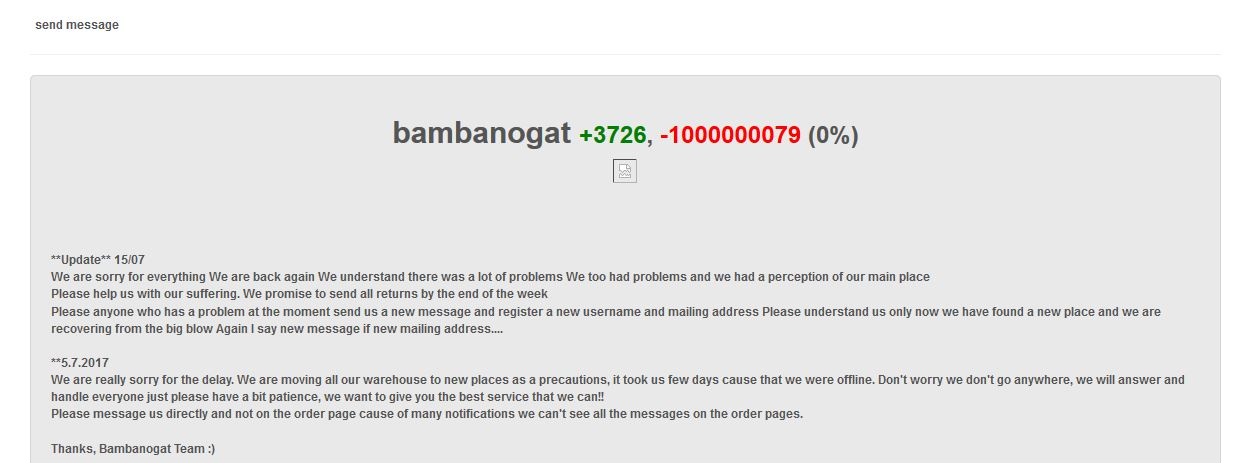

Additionally, there are also people creating unrealistically priced listings:

In [3]:
df[df.Category == "MDMA"].sort_values("BTC",ascending=False)[:2]

,Payment,Highly_Sold,Link,Title,Dollars,BTC,Seller_Name,Feedback_Positive,Feedback_Negative,Feedback_Percentage,Seller_Level,Category,Ships_From,PGP_Verified,Silk_Road_League,Page
14500,ESCROW,False,?listing=aUBmgUrBgEWFzSsgbJHRKNqGQYvMjc29w3kTN...,i got everything for sale. Very good qualliity,5.080010e+09,473444.844555,BlazeBoy,0,0,?,NaN,MDMA,Belguim,False,False,1316
35208,ESCROW,False,?listing=eKPghY2dV6YMqEkCwecCuhsksanQqG6JRKrzh...,10000g MDMA 84 Brown Flawless Crystals,1.045840e+05,9.880911,cocainelord110,0,0,?,NaN,MDMA,USA,False,False,3198


Therefore we remove any listings that cost more than 40BTC. We also remove all listings by the seller with a lot of negative feedback. 

In [4]:
df = df[df.Seller_Name != "bambanogat"]
df = df[df.BTC < 40]

An issue is also that there are a few listings that are exactly the same price, have the same title, the same seller and are within the same category. These duplicates are removed from the dataset as well.

In [5]:
print("Length prior to removal of duplcicates: ", df.shape[0])
df.drop_duplicates(['Highly_Sold','Title', 'Category', 'Seller_Name', 'Dollars'], inplace=True)
print("Length after removal of duplicates: ", df.shape[0])

Length prior to removal of duplcicates:  46956
Length after removal of duplicates:  42717


The final issue with the large dataset is that that the ships from contains many different entries, some with typo's, others about countries with a different spelling. And some aren't even shipping locations. We normalize these values in the ships_from column to only alphanumerical characters

In [6]:
print("Prior to normalization there are {} unique ships_from locations, such as: {}".format(len(df['Ships_From'].unique()),
', '.join(df['Ships_From'].unique()[:10])))
# Normalize to alphanumerical
df['Ships_From'] = df['Ships_From'].apply(lambda x: ''.join(c.lower() for c in str(x) if c.isalnum()))

Prior to normalization there are 1004 unique ships_from locations, such as: USA, TOR, Tor land, United Kingdom, Netherlands, europe, No Ships From Specified, US,  United States of America, Canada


We now start to map this column against a known list of countries/locations. We hand-wrote this mapping.
If multiple locations were mentioned in the Ships_from and all of those locations are within one country or region (europe), we place it under that location. If multiple locations are not in the same region: e.g. 'UK US AUS', we mark it as unspecified since we cannot map it to a single region.

In [7]:
def map_unknown_known(country):
    regions = {"us": "United States", "unitedstates": "United States", "unitedkingdom": "United Kingdom", "sweden": "Sweden", "europe": "Europe", "germany": "Germany", "netherlands": "Netherlands", "china": "China", "canada": "Canada", "france": "France", "eu": "Europe", "usa": "United States", "colorado": "United States", "netherland": "Netherlands", "unitedstatesofamerica": "United States", "australia": "Australia", "ca": "United States", "california": "United States", "italy": "Italy", "austria": "Austria", "america": "United States", "uruguay": "Uruguay", "switzerland": "Switzerland", "brasil": "Brasil", "monaco": "Monaco", "bolivia": "Bolivia", "colombia": "Columbia", "spain": "Spain", "australian1dayexpresszone": "Australia", "australia1dayzone": "Australia", "bulgaria": "Bulgaria", "hungary": "Hungary", "unitedbankruptstatesamerica": "United States", "uk": "United Kingdom", "unkitedstates": "United States", "norway": "Norway", "amsterdamthenetherlands": "Netherlands", "philippines": "Philippines", "aus": "Australia", "austriawitchisnotblacklisted": "Austria", "czechrepublic": "Czech", "metherlands": "Netherlands", "bccanada": "Canada", "unitedstate": "United States", "poland": "Poland", "denmark": "Denmark", "portugal": "Portugal", "nl": "Netherlands", "easteurope": "Europe", "kenya": "Kenya", "ny": "United States", "somewhereinusa": "United States", "netherlandsthe": "Netherlands", "croatia": "Croatia", "georgia": "United States", "usaandmabyeworldwide": "United States", "india": "India", "russia": "Russia", "unitedstatesofamericalower4": "United States", "newzealand": "New Zealand", "brazil": "Brazil", "northamerica": "United States", "nethertlands": "Netherlands", "cameroon": "Cameroon", "asia": "Asia", "ua": "Ukraine", "chitownusa": "United States", "utah": "United States", "morocco": "Marocco", "england": "United Kingdom", "holland": "Netherlands", "ireland": "Ireland", "amsterdamnetherland": "Netherlands", "europa": "Europe", "thenetherlands": "Netherlands", "irelandgermanynorway": "Europe", "anonymousasia": "Asia", "southamerica": "South America", "unitedstateofamerica": "United States", "usalouisiana": "United States", "netherlandsbelgium": "Netherlands", "hollandthenetherlands": "Netherlands", "nethlerand": "Netherlands", "netlherland": "Netherlands", "spainnetherlands": "Europe", "spainornetherlands": "Europe", "slovakia": "Slovakia", "serbia": "Serbia", "unitedstatedofamerica": "United States", "amsterdam": "Netherlands", "belgium": "Belgium", "benelux": "Europe", "switzerlandgermany": "Europe", "italia": "Italy", "congo": "Congo", "romania": "Romania", "mexico": "Mexico", "germanx": "Germany", "netherlandsspain": "Europe", "netherlandsorspain": "Europe", "cayman": "Cayman", "cuba": "Cuba", "peru": "Peru", "westerneu": "Europe", "salemor": "United States", "spainorholland": "Europe", "hollandorspain": "Europe", "amsterdamnetherlands": "Netherlands", "secretbaseineurope": "Europe", "africa": "Africa", "marocco": "Marocco", "unitedkingdon": "United Kingdom", "denvercoloradousa": "United States", "merica": "United States", "usatousaonly": "United States", "ukandeurope": "Europe", "kyrgyzstan": "Kyrgyzstan", "usaa": "United States", "finland": "Finland", "lithuania": "Lithuania", "vietnam": "Vietnam", "southafrica": "South Africa", "copenhagen": "Denmark", "german": "Germany", "oslo": "Norway", "osloeventuelteu": "Norway", "osloeventuelteuomspesifisert": "Norway", "norge": "Norway", "no": "Norway", "eutoeu": "Europe", "cyprus": "Cyprus", "unintedkindom": "United Kingdom", "unintedkingdom": "United Kingdom", "ustous": "United States", "thailand": "Thailand", "egypt": "Egypt", "belgiumandorthenetherlands": "Europe", "belgiumandthenetherlands": "Europe", "netherlandsandbelgium": "Europe", "netherlandsgermany": "Europe", "ceskarepublica": "Czech", "europeanunion": "Europe", "russiasigaint": "Russia", "unitedkindgom": "United Kingdom", "am": "Armenia", "usd": "United States", "europeland": "Europe", "unitedarabemirates": "United Arab Emirates", "aud": "Australia", "westerneurope": "Europe", "vancouver": "Canada", "malaysia": "Malaysia", "dutch": "Netherlands", "columbia": "Columbia", "unitedstaes": "United States", "usatousa": "United States", "usca": "United States", "usaca": "United States", "londonunitedkingdom": "United Kingdom", "nederland": "Netherlands", "nederlands": "Netherlands", "blueangelhostbulgaria": "Bulgaria", "fran": "France", "greatbritain": "United Kingdom", "namerica": "United States", "italty": "Italy", "ger": "Germany", "espagne": "Spain", "eutoworldwide": "Europe", "usaworldwide": "United States", "eueu": "Europe", "usausa": "United States", "europeanunionterritory": "Europe", "greece": "Greece", "ghana": "Ghana", "danmark": "Denmark", "bermuda": "United Kingdom", "virgincardsislands": "United States", "ukdigital": "United Kingdom", "murica": "United States", "denvercousa": "United States", "it": "Italy", "tx": "United States", "cali": "United States", "dc": "United States", "ga": "United States", "detroit": "United States", "belgiumgermanyfrance": "Europe", "unitedststes": "United States", "unitedkingdomtoworldwidefree": "United Kingdom", "sua": "United States", "states": "United States", "ukdirecttobtcwallet": "United Kingdom", "unitedkindom": "United Kingdom", "westhawai": "United States", "bosniaandherzegovina": "Bosnia", "bosniaeu": "Bosnia", "belgiumornetherlands": "Europe", "nanjing": "China", "argentina": "Argentina", "indiasingapor": "Asia", "indiasingapore": "Asia", "northernireland": "Ireland", "nederlandsbelgiumgermany": "Europe", "belgiumgermanynederlands": "Europe", "nederlandsbelgium": "Europe", "euro": "Europe", "deutschland": "Germany", "newzeland": "New Zealand", "la": "United States", "thenetheralnds": "Netherlands", "jamaica": "Jamaica", "sydneyaustralia": "Australia", "germanyinternet": "Germany", "unitedkingdomornetherlands": "Europe", "unitedkingdomornetherland": "Europe", "unitedstated": "United States", "nepal": "Nepal", "freeusaovernightshippingono": "United States", "europenoredflagcountries": "Europe", "europenoredflagcountry": "Europe", "gemrany": "Germany", "be": "Belgium", "fr": "France", "denmarkallsamplesgoesfromdk": "Denmark", "denmarkandsweden": "Denmark", "unitesstates": "United States", "suisse": "Switzerland", "french": "France", "ukonline": "United Kingdom", "luxembourginstantviathecloud": "Luxembourg", "westcoast": "United States", "netherlandsamsterdam": "Netherlands", "germanay": "Germany", "pilippines": "Philippines", "asutralia": "Australia", "beligum": "Belgium", "californiaunitedstates": "United States", "estonia": "Estonia", "francespaineuskadi": "Europe", "franceorspain": "Europe", "unitedstatsofamerica": "United States", "mercosur": "South America", "newyork": "United States", "qatar": "Qatar", "germanynetherlands": "Europe", "rotterdam": "Netherlands", "chinahongkong": "China", "amerca": "United States", "chicago": "United States", "nlorbe": "Europe", "nlbe": "Europe", "centraleurope": "Europe", "irelanduk": "Ireland", "rigalatvia": "Latvia", "ecuador": "Ecuador", "theantilles": "Antiles", "pa": "United States", "neterlands": "Netherlands", "israel": "Israel", "unitedstst": "United States", "unitedsates": "United States", "unitedstatses": "United States", "easterneuropean": "Europe", "easteuropean": "Europe", "easteuriopean": "Europe", "easterneurope": "Europe", "easteur0pean": "Europe", "uspsfedex": "United States", "safetyplaceineu": "Europe", "usacolorado": "United States", "uacolorado": "United States", "isa": "United States", "australai": "Australia", "macedonia": "Macedonia", "germanyholland": "Europe", "useastcoast": "United States", "irelandnorway": "Europe", "australianewzealand": "Australia", "sunnysouthafrica": "South Africa", "trinidad": "Trinidad", "caribbean": "Carribean", "guatemala": "Guatemala", "theunitedstates": "United States", "eastcoastusa": "United States", "berlindeutshland": "Germany", "london": "United Kingdom", "ukraine": "Ukraine", "britain": "United Kingdom", "uniedstates": "United States"}
    return regions.get(country, "Unknown")    

df['Ships_From'] = df['Ships_From'].apply(map_unknown_known)
print("After normalization there are {} unique ships_from locations".format(len(df['Ships_From'].unique())))
    

After normalization there are 78 unique ships_from locations


## Results
To begin our analysis, we are first going to take a look at our 100 selected listings. Therefore we load our Google Sheets document which we exported to a csv with our 100 selected listings into a Pandas Dataframe. The 100 selected listings can be seen in more detail in Appendix A.

In [8]:
data = pd.read_csv('custom_entries.csv')
data.head()

,What,Link,Price (in $),Legal/Illegal/Depends,Why,Category,Seller,Positive feedback (of the seller),Negative feedback (of the seller),Number of stars,Number of posts,Ships from
0,House of Cards and Philosophy Underwoods Repub...,http://silkroad7rn2puhj.onion/?listing=obUcTkr...,4,Depends,Depends on if the copy is aquired illegaly/is ...,Books / Guides,pckabml,1260,0,2,6503,Internet
1,The Botnet Guide,http://silkroad7rn2puhj.onion/?listing=3PWgkQ9...,1,Depends,"Purchasing the guide is fine, as long as it is...",Books / Guides,PaperAgent,4431,8,3,574,Unspecified
2,The Walking Dead - PC game,http://silkroad7rn2puhj.onion/?listing=TdG6pDd...,4,Depends,Depends on if the copy that he is selling is i...,Software,Junkiepig666,1843,0,2,518,Unspecified
3,The Ultimate Burger Book Delicious Meat and Ve...,http://silkroad7rn2puhj.onion/?listing=dxjsQhy...,4,Legal,"Nothing wrong here, Just a someone selling the...",Books / Guides,Junkiepig666,1843,0,2,518,Unspecified
4,Your Brain on Food: How Chemicals Control Your...,http://silkroad7rn2puhj.onion/?listing=rnQtoGt...,2,Depends,Depending on whether or not the book is an ill...,Books / Guides,Junkiepig666,1843,0,2,518,Unspecified


### **Legality**
The majority of the products we found on SilkRoad were illegal, however with a little over a quarter the legality of the items being sold is questionable.

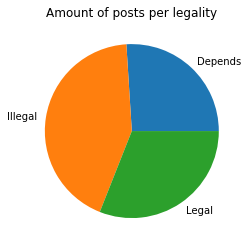

In [9]:
data['Legal/Illegal/Depends'] = data['Legal/Illegal/Depends'].str.strip()
legality_group = data.groupby('Legal/Illegal/Depends').size()
plt.axis('off')
plot = legality_group.plot(kind='pie', title="Amount of posts per legality")

### **Shipping location**
#### Shipping location in selected 100 listings

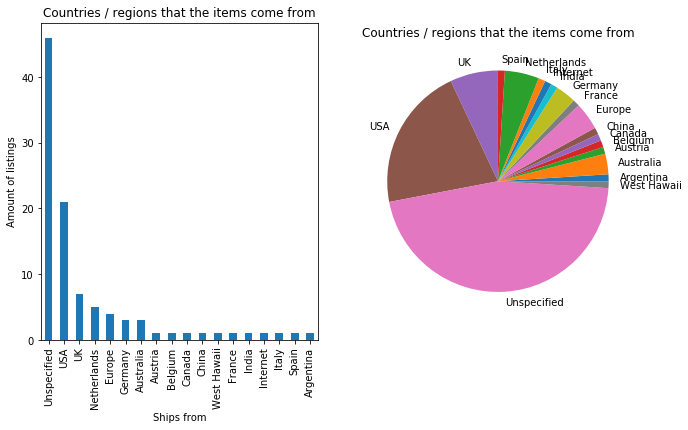

In [10]:
data['Ships from'] = data['Ships from'].str.strip()
shipping_group = data.groupby('Ships from').size()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
plt.tight_layout()

plt.subplot(1,2,1)
plot = shipping_group.sort_values(ascending=False).plot(kind='bar', title="Countries / regions that the items come from")
plot.set_ylabel("Amount of listings")
plt.subplot(1,2,2)
plt.axis('off')
plot2 = shipping_group.plot(kind='pie', title='Countries / regions that the items come from')

The majority of the items chosen had an unspecified country from where they were being shipped as seen above. The second largest amount of items were shipped from the United States of America. However this graph only makes clear where items were shipped from and not what the nationality is of the seller. We wonder how this compares to the entire Silk Road and if we captured a somewhat accurate representation of the Silk Road in our selection. Therefore we look at the shipping origins of the top 10 countries in the large dataset.

#### Shipping location in large dataset

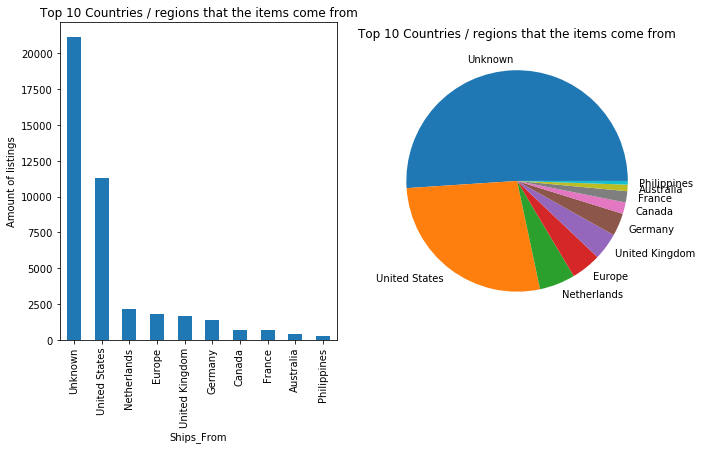

In [11]:
shipping_group = df.groupby('Ships_From').size()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
plt.tight_layout()
plt.subplot(1,2,1)
plot = shipping_group.sort_values(ascending=False)[:10].plot(kind='bar', title="Top 10 Countries / regions that the items come from")
plot.set_ylabel("Amount of listings")

plt.subplot(1,2,2)
plt.axis('off')
plot2 = shipping_group.sort_values(ascending=False)[:10].plot(kind='pie', title='Top 10 Countries / regions that the items come from')

Our selection of 100 seems to be quite close to the reality on Silk Road. In both graphs the majority of shipping origins is unknown. The United States has a large amount of additional listings compared to the Netherlands in both graphs. However, the United Kingdom is the third place in our small selection, while it is fifth place in the large dataset. 

#### Market value of shipping locations
While the numbers above suggest the USA, Netherlands and Europe have one of the largest black markets, we do not yet know how much value these markets actually carry. In order to investigate this, we looked at the total amount in US Dollars that the listings in the large dataset comprise in each region.

,Highly_Sold,Dollars,BTC
Other regions,186.0,1252734.780,117.309841
Unknown,828.0,4384920.175,411.168905
United States,442.0,3113829.930,291.869294
France,57.0,2314775.000,216.304898
Netherlands,304.0,1633246.240,152.896023
Europe,84.0,1406157.000,131.885448
United Kingdom,215.0,832056.730,77.996260
Germany,94.0,411547.840,38.609987
Canada,45.0,385871.250,36.119164
Peru,0.0,373346.000,35.089686


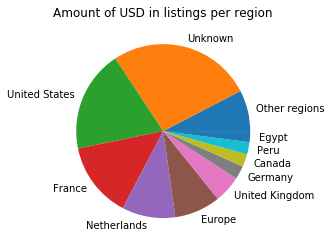

In [12]:
shipping_location_value = df.groupby('Ships_From').sum().sort_values("BTC", ascending=False)[['Highly_Sold', "Dollars", "BTC"]]
top_10 = shipping_location_value.iloc[:10,:]
others = pd.DataFrame([shipping_location_value.iloc[10:,:].sum()], index = ["Other regions"])
top_10 = pd.concat([others, top_10])
plt.axis('off')
top_10["Dollars"].plot(kind='pie', title="Amount of USD in listings per region")
top_10

#### Feedback per shipping location
 We wondered how content people were with each of these regions. In order to get some indication, we look at the total feedback per country/region. 

,Feedback_Positive,Feedback_Negative,Amount of sellers
Other regions,30583,1790,371
Unknown,273298,8551,1477
United States,106203,6098,910
Netherlands,84712,4683,225
United Kingdom,63840,2548,307
Europe,53422,3402,245
Germany,30452,2355,194
Spain,18055,795,41
Italy,13257,418,30
France,12676,692,69


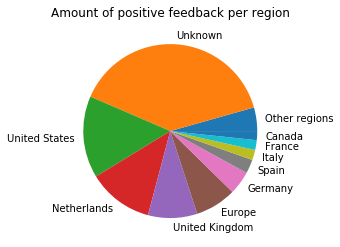

In [13]:
# Each country has people that have multiple listings. We want to know the total feedback per region and thus do not include 
# multiple listings by the same person in the same country
removed_multiple = df.drop_duplicates(['Seller_Name', "Ships_From"])
removed_multiple = removed_multiple.groupby('Ships_From').agg({"Feedback_Positive": "sum", "Feedback_Negative":"sum", "Seller_Name": "count"}).sort_values("Feedback_Positive", ascending=False).rename(columns={"Seller_Name": "Amount of sellers"}) [['Feedback_Positive', 'Feedback_Negative', 'Amount of sellers']]
top_10 = removed_multiple.iloc[:10,:]
others = pd.DataFrame([removed_multiple.iloc[10:,:].sum()], index = ["Other regions"])
top_10 = pd.concat([others, top_10])
plt.axis('off')
top_10["Feedback_Positive"].plot(kind='pie', title="Amount of positive feedback per region")
top_10

We were actually quite surprised by this result. Even though the United States has a lot more sellers than the Netherlands, almost 4 times as much, the United States only has 1.2 times as much positive feedback as the Netherlands. 


### Categories
Silk Road has it's own category system. However in our selection of 100 listings there were a few occasions where the categories from Silk Road did not fit the listing or were not specific enough. Therefore we gave the listings our own categories. 
#### Categories in selection

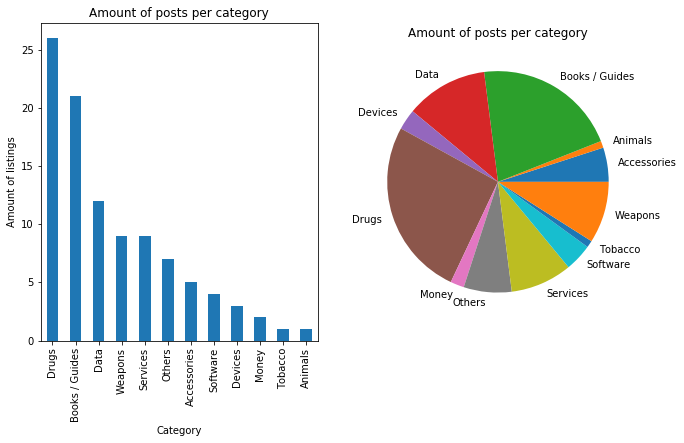

In [14]:
data['Category'] = data['Category'].str.strip()
category_group = data.groupby('Category').size()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9,5))
plt.tight_layout()

plt.subplot(1,2,1)
plot = category_group.sort_values(ascending=False).plot(kind='bar', title="Amount of posts per category")
plot.set_ylabel("Amount of listings")

plt.subplot(1,2,2)
plt.axis('off')
category_group.plot(kind='pie', title="Amount of posts per category")

As seen in the charts above the majority of the posts that we have selected sell drug related products. These ranged from prescription drugs such as ritalin, to hard drugs such as cocaine. The second most sold category of items were (e)Books and guides. These ranged from just regular books, to books not being for sale in certain countries such as Mein Kampf from Adolf Hitler. The guides also ranged from having quite regular content such as “The Ultimate Burger Book Delisious Meat and Vegeterian” to slightly disturbing such as “ A Practical Guide to Suicide”.

#### Categories in large dataset
Classifying the large dataset with our own categories would be an incredibly large task. Therefore the categories that are defined by the author on the Silk Road has been used for analysis.

Text(0, 0.5, 'Amount of listings')

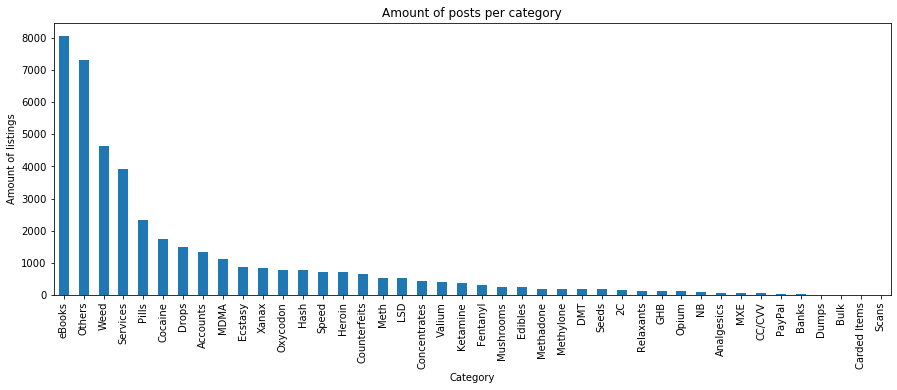

In [15]:
category_group = df.groupby('Category').count().sort_values("Link", ascending=False)['Link']

plot = category_group.sort_values(ascending=False).plot(kind='bar', title="Amount of posts per category", figsize=(15, 5))
plot.set_ylabel("Amount of listings")

It appears the majority of postings (8062) is in the eBooks category. However, the Silk Road definitely is not an illegal eBook market. It might appear this way because the drugs category is split up into many specific drugs. If one adds up the categories of weed (4640), pills (2341) and cocaine (1745), these three categories already surpass the amount of listings in eBooks:
$4640 + 2341 + 1745 = 8726$

#### Value of categories
One might observe that the selection of 100 items contained a few very highly priced services (above USD 1000), but also contained free items. This lead us to question which categories had the most value. In this case value means the total of asking prices for listings in the category. This can only give an indication of which categories have the most value, since there are multiple listings by a single seller in a category. One listing might be sold 100 times, or not even once. Therefore this does not give an accurate representation of the trade volume on the Silk Road.

In [16]:
df.groupby(['Category']).sum().sort_values("BTC", ascending=False)[["Highly_Sold", "Dollars", "BTC", "Silk_Road_League"]]

,Highly_Sold,Dollars,BTC,Silk_Road_League
Category,,,,
Cocaine,207,3008462.590,281.620884,103
LSD,61,1977114.000,184.808151,32
Others,192,1723019.690,161.392048,446
Weed,327,1706883.570,160.002590,274
Services,143,1222991.860,114.668948,1433
Drops,71,989588.990,92.961839,415
Counterfeits,34,915905.320,85.648142,35
Pills,56,822674.000,77.263269,27
MDMA,100,798632.490,75.012211,55


The above table shows us that the Cocaine category contains many listings that add up to a large dollar value. In the previous graph we can see that the cocaine category has less than half the listings of the weed category. This indicates that the cocaine quantities on the black market are priced a lot higher than the weed quantities on the black market.  Nonetheless Weed does have the most listings of which the Silk Road indicates that they are highly sold. We are not certain when exactly the Silk Road indicates that a listing is highly sold. The Silk Road will also give certain sellers the ```Silk Road League``` status when they have over 99% positive feedback and over 600 review score (positive feedback minus negative feedback). The majority of listings made by these Silk Road League accounts are in the eBooks, Services and Accounts category. These are all categories of goods that do not require physical shipping but can be delivered digitally. Because of this it might be easier to create sales and get a high review score.

##### Most popular words in titles per category
It is unfortunately not possible to get a good look at each of the titles in our large dataset due to the sheer quantity of listings. Therefore the most frequent words in the titles per category was analyzed.

In [17]:
for category in df['Category'].unique():
    top = pd.Series(' '.join(df[df.Category == category]['Title']).lower().split(), dtype=object).value_counts()
    print("Five most frequent words in {} are {}".format(category, ', '.join(top.index.values[:5])))


Five most frequent words in Services are -, premium, account, to, gift
Five most frequent words in Cocaine are cocaine, pure, uncut, quality, fishscale
Five most frequent words in Weed are kush, haze, quality, weed, og
Five most frequent words in Concentrates are vape, shatter, bho, oc, pharm
Five most frequent words in Others are pills, mg, and, -, tablets
Five most frequent words in MDMA are mdma, pure, crystals, dutch, 84%
Five most frequent words in Ketamine are ketamine, 1g, s, -, gram
Five most frequent words in LSD are lsd, blotters, x, -, blotter
Five most frequent words in DMT are dmt, and, spirit, quality, 1g
Five most frequent words in Hash are hash, hashish, quality, moroccan, pollen
Five most frequent words in Speed are speed, paste, amphetamine, pure, dry
Five most frequent words in Heroin are heroin, #3, pure, afghan, gram
Five most frequent words in Pills are pills, adderall, mg, xtc, x
Five most frequent words in 2C are 2cb, pure, 2, analogue, hq
Five most frequent wor

Most of these results are to be expected. The above list also shows the alternative/street names of many drugs, such as ```fishscale``` for very high-quality cocaine [source](https://www.urbandictionary.com/define.php?term=fishscale). It is odd that the Others category has a lot of items that have ```Pills``` in the title, because there is a dedicated Pills category. Furthermore there are a lot of listings in the Ecstasy category with ```mdma``` in the title even though there is a dedicated MDMA category. 

### Sellers
##### Sellers with the most listings
The top 10 sellers on the Silk Road can be determined using our large dataset. 

In [18]:
df.groupby("Seller_Name").count()["Link"].sort_values(ascending=False)[:10]

Seller_Name
pckabml          5957
etimbuk          1866
captainkirk       700
willscatholie     533
PaperAgent        526
Junkiepig666      456
therepository     397
jakescofield      358
robertpeters      317
savanah33         243
Name: Link, dtype: int64

The seller with the most number of posts is pckabml with 5957 posts. Using the Silk Road website one can see that he actually has 6503 posts, however this is including the duplicate posts which were removed in the ```Removing the discrepencies``` section. Regardless of this he is by far the seller with the most listings. This can be explained by the fact that this seller only sells eBooks. This is a fairly easy item to provide since it is something digitally. Sellers that sell physical things that need to be shipped appear to sell less items.

##### **Positive feedback of sellers**

In [19]:
print("There are {} accounts with no positive feedback out of {} accounts total".format(df.drop_duplicates("Seller_Name").query('Feedback_Positive == 0').shape[0], len(df.Seller_Name.unique())))

There are 2101 accounts with no positive feedback out of 3140 accounts total


A lot of sellers have no feedback. This is mostly likely due to them being new accounts on the site. The amount of new sellers might have something to do with sellers creating new accounts to remain anonymous and to make it more difficult to track them. 

Text(0, 0.5, 'stars')

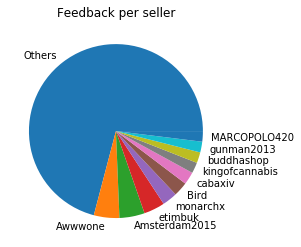

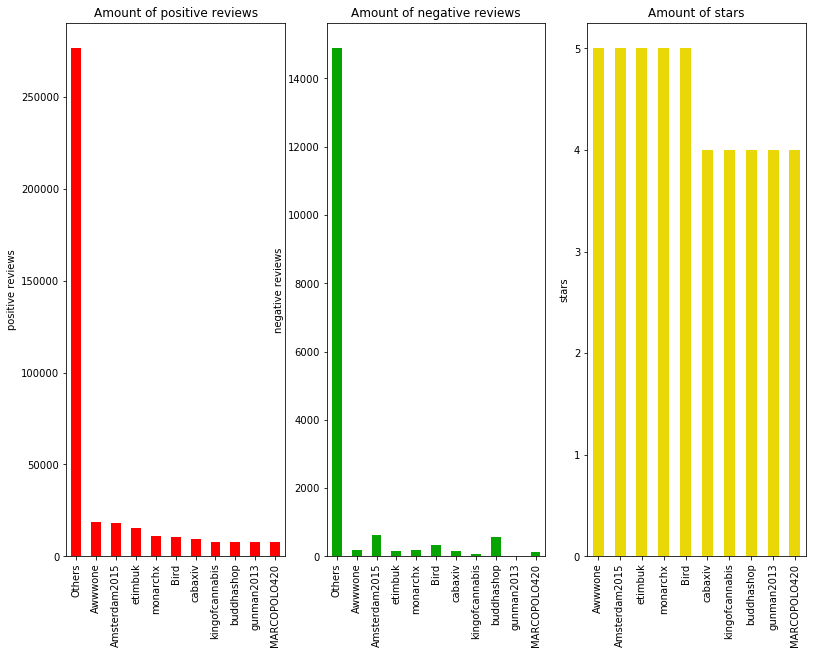

In [20]:
top_feedback = df.drop_duplicates("Seller_Name").sort_values("Feedback_Positive", ascending=False).set_index('Seller_Name')[["Feedback_Positive", "Feedback_Negative", "Feedback_Percentage", "Seller_Level", "Silk_Road_League"]]
top_10 = top_feedback.iloc[:10,:]
others = pd.DataFrame([top_feedback.iloc[10:,:2].sum()], index = ["Others"])
top_10 = pd.concat([others, top_10])
top_10["Feedback_Positive"].plot(kind='pie', title="Feedback per seller")
plt.axis('off')
top_10

seller_fig, seller_axes = plt.subplots(nrows=1, ncols=3, figsize=(11,8))
plt.tight_layout()

ax1 = plt.subplot(1,3,1)
plot1 = top_10["Feedback_Positive"].plot(ax=ax1, kind='bar', y='positive reviews',title='Amount of positive reviews', legend=False, color='r')
plot1.set_ylabel("positive reviews")

ax2 = plt.subplot(1,3,2)
plot2 = top_10["Feedback_Negative"].plot(ax=ax2, kind='bar', y='negative reviews', title='Amount of negative reviews', legend=False, color='#07a301')
plot2.set_ylabel("negative reviews")

ax3 = plt.subplot(1,3,3)
top_10["Seller_Level"] = top_10["Seller_Level"].str.replace('Level', '').astype(float)
plot3 = top_10["Seller_Level"][1:].plot(ax=ax3, kind='bar', y='stars', title='Amount of stars', legend=False, color='#ead707')
plot3.set_ylabel("stars")


The seller gets awarded stars based on their percentage of positive vs negative feedback, and the total amount of feedback that was given.

##### Sellers with the highest value of listings

,Dollars,BTC
Others,1.147937e+07,1075.990645
devilhard6shop,1.799156e+06,167.761531
HollandDutch,4.270360e+05,40.135837
joaodasneves,4.139800e+05,38.908741
twrpenny,4.000500e+05,37.664473
safr47,3.891390e+05,36.634797
LimaConnection,3.732900e+05,35.084411
milkatop,3.478380e+05,32.420708
Amsterdam2015,3.135480e+05,29.193585
peterclark,2.501080e+05,23.410008


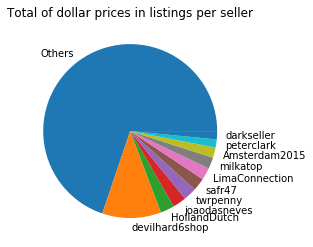

In [21]:
top_sellers = df.groupby("Seller_Name").sum().sort_values("Dollars", ascending=False)[["Dollars", "BTC"]]
top_10 = top_sellers.iloc[:10,:]
others = pd.DataFrame([top_sellers.iloc[10:,:].sum()], index = ["Others"])
top_10 = pd.concat([others, top_10])
top_10["Dollars"].plot(kind='pie', title="Total of dollar prices in listings per seller")
plt.axis('off')
top_10


In the above plot we can see that there is one account that makes up a chunk of the total value of the Silk Road (where value means the total amount of dollars being asked in listings). Upon further analysis it seems that this user ```devilhard6shop``` has 135 listings, of which many are for large quantities of drugs. The user does not appear to have sold much of these large quantities, due to the fact that he is not even level 1 on the Silk Road.

### Miscellaneous
#### Most expensive highly sold items
On the Silk Road there is a 'highly sold' flag which gets added to certain listings. A tooltip further clarifies that this is added when the product has received a lot of sales lately.

In [22]:
most_sold = df[df.Highly_Sold == True]
most_sold.sort_values('Dollars', ascending=False)[:20]

,Payment,Highly_Sold,Link,Title,Dollars,BTC,Seller_Name,Feedback_Positive,Feedback_Negative,Feedback_Percentage,Seller_Level,Category,Ships_From,PGP_Verified,Silk_Road_League,Page
10546,FE,True,?listing=sAjkm9avquxc62Es7pXkEnS0oUnsoQOUQw41u...,1kg Colombian Cocaine Above 90 ♛ Premium Quality,32000.0,2.988834,Deepstatus,1900,4,100.0,Level 2,Cocaine,Netherlands,True,True,953
5916,ESCROW,True,?listing=WmHWvByrtkET9eKmaUaKXSdUaOZm5kkRMso7t...,One Kilo 1000 Grams of Uncut Fishscale Cocaine,17625.0,1.646276,kpinned,60,0,100.0,NaN,Cocaine,United States,False,False,537
45187,ESCROW,True,?listing=zKPPyCKFjpnWJMtUGfyjeAVBnqhR9wqx64Bu6...,Lc-cocaine 1 kilo,12000.0,1.129793,safr47,326,52,86.0,Level 1,Cocaine,France,False,False,4105
154,ESCROW,True,?listing=OEFN7ebExSynktYK90fV03dG1q8nMSuYXzmTU...,CUSTOM ORDER 10.000 MDMA pills 220mg Tracked...,11500.0,1.070879,italianmafia,3196,125,96.0,Level 3,Pills,Netherlands,True,False,14
10356,FE,True,?listing=S5FzYzZeEHsBFNRnVPXaXWARFMkSXXCqSHdq7...,"6lbs Pit Bull, Maui Wowie, 9lb Hammer, Blue Dream",10000.0,0.931976,HQPunlimited,696,0,100.0,Level 2,Weed,Unknown,True,True,936
10354,FE,True,?listing=anyOWmNcurFcnX95nKEAqZHxJ2bOJVwk8kxTK...,"4lbs Pit Bull, Maui Wowie, 9lb Hammer, Blue Dream",7250.0,0.675683,HQPunlimited,696,0,100.0,Level 2,Weed,United States,True,True,936
41484,ESCROW,True,?listing=SQy23tr5CHhSXUtm0nx2vYM4PjStRkwh1jYsR...,100g Original Columbian Cocaine 89Pure,4000.0,0.375948,kingknows,0,0,?,NaN,Cocaine,Germany,False,False,3769
10532,ESCROW,True,?listing=8Q5KMf1206NHhvWksmC2cvM5mXcsbrKZ7DjGk...,CUSTOMO,3500.0,0.326904,sinatra2002,6659,307,96.0,Level 4,MDMA,Unknown,True,False,952
10352,FE,True,?listing=rzrUhrUunP9bvnUdeGHuPHqRxVhbW1mCqSWN8...,"2lbs Pit Bull, Maui Wowie, 9lb Hammer, Blue Dream",3450.0,0.321532,HQPunlimited,696,0,100.0,Level 2,Weed,United States,True,True,936
14675,ESCROW,True,?listing=70zOQ8cEc4C8qvb6augKpdK9J4S4VN8RNwecu...,500gr - Super Indica Weed 22% - Ask for strains.,2900.0,0.270863,letsgetbig,74,7,91.0,NaN,Weed,Denmark,False,False,1332


It appears that large quantities (1kg) of cocaine are the most expensive items that will still be sold frequently.

#### Wordcloud 

How would one summarize the Silk Road? Due to the broad difference in listings on the Silk Road, it is hard to give a description of the Silk Road. The following word cloud assists in giving such a description. The word cloud is created by analyzing the frequency of each word in the titles of listings. The obvious stopwords have been removed as to not clutter the wordcloud. 

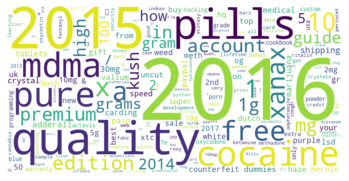

In [23]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
temp = df[df.Title != "Listing title corrupted. Add new title."]
freqs = pd.Series(' '.join(temp['Title']).lower().split()).value_counts()
freqs = freqs.drop(labels=["-", "and", "the", "of", "for", "to", "with"])
# freqs
wordcloud = WordCloud(width=800, height=400, background_color="white")
wordcloud.generate_from_frequencies(frequencies=freqs)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The most frequent occurring 'words' appear to be years. This is the case due to the fact that the Silk Road was highly active in the 2015 and 2016 era, and a lot of eBooks were uploaded to the Silk Road in that time. The eBooks often have a year in their title. 

#### **Top 3 surprising posts**
Our top three for most surprising posts is the following: <br/> 

<b>Number 1:</b> Very friendly parrot (african grey) <br/>

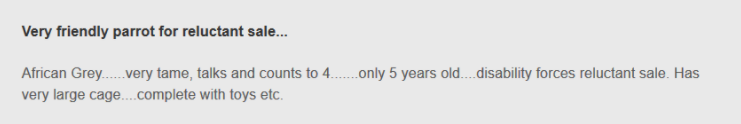
<b>Number 2:</b> Pizza Hut - Delivery - \\$100 in food for \\$20 <br/>

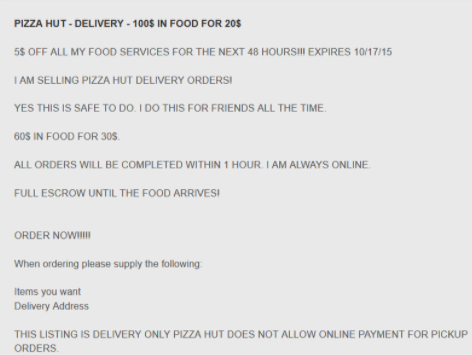
<b>Number 3:</b> Anonymous wallpaper printed on wood Art!
<br/>

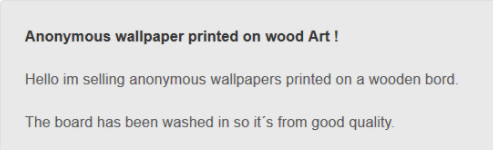


These posts are chosen as you’d expect things such as drugs and weapons to be found on the deep web. While you might expect (endangered) animals on the deep web this is the only one we found and we were surprised as it being advertised as “friendly” parrot.  Something like having food delivered to you for a much lower value price is something that we did not really expect to find on a black market, so it seemed kind of funny to us. Unfortunately the offer expired on the 17th of october 2015. Additionally, we were intrigued by the, specifically anonymous, wallpapers being printed in wood, as this seems like it could be a legitimate business that does not need to be on the deep web.  

#### **Top 3 sellers that the police should investigate**

<b>Number 1:</b> blanco999: is a seller of the C4 + MP5K submachine gun <br/>

> This seller sells 13 weapons and explosives. This is not only dangerous, but can lead to fatal consequences including taking people’s lives if sold to people with unethical intentions. <br/>

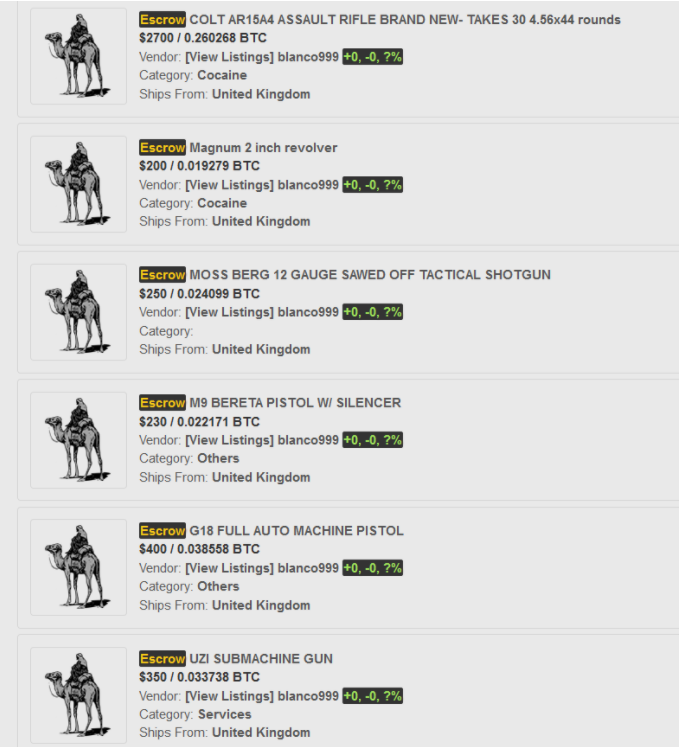



<b>Number 2:</b> tortrustedmeds - Hitman

>The reason why this seller is in our list is quite self explanatory: the seller is able to arrange a hitman. Murder is illegal and a severe crime. They furthermore also sell a big variety of illegal drugs. <br/>

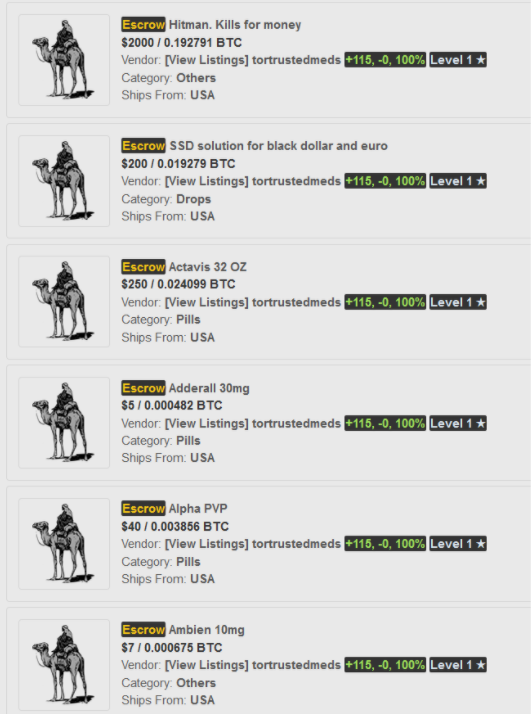

<b>Number 3:</b> Bodypartsguy <br/>

>He sells 2 human kidneys, it is probably worth investigating how they got these human organs. And we assume that organ trading is illegal. <br/>

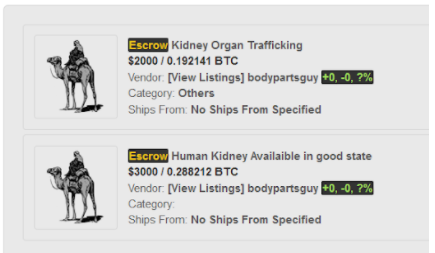


## Conclusions & Reflections

First off, it needs to be taken into account that what our selection of 100 items might not be an accurate representation of the black market SilkRoad, as the are almost 47000 products being offered and only a fraction of it was analyzed. Our data analysis of the 47000 listings provides more statistics on the overall website, but is less specific in categories and does not have any legality information.

This research showed that a black market does not only sell illegal things. In fact from the 100 items analyzed almost a third were legal goods. However also about a quarter was classified as 'it depends'. This was mostly the case for (e)Books, as that buying books is not illegal as long as they are not reproduced or distributed without consent from the author/publisher, since then you will be infringing the copyright. 

The most sold items on the black market were drugs. These drugs range from soft drugs like, marijuana which is legal in some countries, to hard drugs such as heroin which is prohibited in almost all countries. The categories of Cocaine, LSD and Weed have many listings on the Silk Road, which adds up to millions of dollars. This is partly because the large (bulk) quantities of certain drugs are being sold and bought (such as 1kg of Cocaine). Buying a small amount of drugs online for personal use is not threatening to other people and can thus be considered as a minor conflict in social norms. However, it is inevitable that a lot of people fuel their drug addictions with such dark markets, leading to self-destructive habits and other drug crimes and thus making us question if Ulbrichts initial good intent is already valueless.

Nonetheless, there are far worse items and services on The Silk Road than a range of prescription and street drugs. These include weapons like sub-machine guns and fully automatic rifles that are readily delivered with magazines and ammunition, turning anyone who purchases into a threat for society far more dangerous than some drug users. These items can however be topped in their destructiveness with C4 plastic explosives that are also sold there. It is obvious that those items, from their very nature, are created with the sole purpose of killing, harming and terrorizing other human beings. This is what we expected to find on the dark web and what we think this should be monitored with much more efforts by authorities.

Our search led to even more disturbing findings such as human organ trafficking and professional hitman, or asassination services. Sellers like this ignore human rights and are unscrupulous in their way of earning their money. We won't theorize about their motives to do such atrocities and think that such people should be rigorously pursued by law to keep them from doing harm to other human beings.

There also is a whole range of less disturbing things that can be found on the black market, mainly (e)books. This is logical as a lot of people are not willing to pay a lot for books anymore. Another reason is that depending on the country some materials may be inaccessible due to the country censoring it. For example, Mein Kampf from Adolf Hitler is not available for purchase in Germany. A finding that surprised us was someone offering to deliver food for a price way less worth than its original price. Additionally there was a seller selling wallpapers printed on wood. This was surprising as it seems like it could be a normal legitimate business idea. 

A lot of sellers sell more than one specific product. For example the seller offering a hitman service also sells drugs. Most products are being shipped from an unspecified location. This most likely has to do with the sellers desire for annonimity. From what was analyzed a lot of products are being shipped from the United States, the Netherlands and other European countries. An interesting observation from our analysis is that while the Netherlands has almost 4 times less listings than the US, the US only has 1.2 times as much positive feedback. This indicates that Dutch listings gather more positive feedback than US listings. Combine this knowledge with the fact that a lot of accounts with a high feedback score only deliver digital goods, and one should know a part of the secret to running a succesful business on the Silk Road.

The analysis of the listings on the Silk Road have allowed us to look deeper into what makes such a listing succesful. While we already collected a lot of data in our scraping, for a future research we would also like to scrape the actual content of the listings and be able to plot the feedback gained over time. Using this data we would be able to get a better overview in what is actually being sold on the Silk Road, as we currently do not have any indicator other than the 'Highly Sold' flag provided by the Silk Road itself. Surfing dark web marketplaces was an interesting and thrilling experience where we expected to see many unusual things and were not disappointed. The motivation of such website owners and communities is interesting: enabling people to sell and buy anything they desire, even though most of the items pose serious threats to individuals and society as a whole. We are happy that we did not encounter any offensive pictures or harmful acts against children but know that, even though we did not find any, these exist in even darker corners of the dark web.


# Appendices
##  A: Selection of 100 listings

In [24]:
# set max amount of rows and colums to infinite
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
data

,What,Link,Price (in $),Legal/Illegal/Depends,Why,Category,Seller,Positive feedback (of the seller),Negative feedback (of the seller),Number of stars,Number of posts,Ships from
0,House of Cards and Philosophy Underwoods Republic 2016 (ebook),http://silkroad7rn2puhj.onion/?listing=obUcTkrC0JoFkwycJ1zvUPD6uhSKvNAXoU175f94qn9PXxrfnfR7vV2d4JpoVp09,4,Depends,Depends on if the copy is aquired illegaly/is copied since it then it is copyright infringement,Books / Guides,pckabml,1260,0,2,6503,Internet
1,The Botnet Guide,http://silkroad7rn2puhj.onion/?listing=3PWgkQ9yvaz5wV50nOhMnMyOGTY3VHQNWmu62ttmHhe53Z4enbqOndauxzmG72UT,1,Depends,"Purchasing the guide is fine, as long as it is not a copy of an existing book. Then you would be infringing copyrights. The guide may contain methodologies that are illegal to execute.",Books / Guides,PaperAgent,4431,8,3,574,Unspecified
2,The Walking Dead - PC game,http://silkroad7rn2puhj.onion/?listing=TdG6pDd7mrXnn13EQBoBKo24wMJcMjHeBParS4n4k0eNzXRDY5Fjg7bTHkvTJ3yM,4,Depends,Depends on if the copy that he is selling is illegal. If it is a copied or cracked version then its illegal.,Software,Junkiepig666,1843,0,2,518,Unspecified
3,The Ultimate Burger Book Delicious Meat and Vegetarian,http://silkroad7rn2puhj.onion/?listing=dxjsQhyQTCknH6f8rWsBpmbDwo7brQQJCy2TWqhqsGS1CxxtJevyEM32zySfDhpF,4,Legal,"Nothing wrong here, Just a someone selling their delicious burger recipies",Books / Guides,Junkiepig666,1843,0,2,518,Unspecified
4,Your Brain on Food: How Chemicals Control Your Thoughts and Feel (book),http://silkroad7rn2puhj.onion/?listing=rnQtoGt9097HEyqhcCCazwMnc0kDdvnKW2399k78j4FprwMJyPjo0vPcvzgOjHY5,2,Depends,Depending on whether or not the book is an illegal copy of the book,Books / Guides,Junkiepig666,1843,0,2,518,Unspecified
5,A practical guide to suicide,http://silkroad7rn2puhj.onion/?listing=aZq1Mc70wsHn7TSx0fJXzvtCyHbpqJnFhR6ut3tek2GfJYSH5aetMOw0VOpAWQG5,2,Legal,Owning such a document is not illegal. Suicide is difficult to define legal or illegal.,Books / Guides,Junkiepig666,1843,0,2,518,Unspecified
6,Mein Kampf - A. Hitler,http://silkroad7rn2puhj.onion/?listing=bZ2XDw9fbX5bQroxrkwEG4Mha9fqBMZdkQ1pBzJcMD4augOZG9eP3qwSoR8qbWJB,2,Illegal,This Book is illegal to own / distribute,Books / Guides,Junkiepig666,1843,0,2,518,Unspecified
7,white and yellow xanax,http://silkroad7rn2puhj.onion/?listing=xNCP6aK0cYHDT0Tm5VO9SK76m83PYqwM2yZwPkws84wR4E2xZEvsPsnzqeDDJ1P0,2,Depends,Benzos are illegal to own if not prescriped,Drugs,Donaldsilk,30,0,0,254,USA
8,0.4g PURE UNCUT China White Heroin,http://silkroad7rn2puhj.onion/?listing=tZJUYxe1tfr6y69RpHg6vYo441ezkJ4SjCn8zGyhodcaZbsCkP8VnmOfatUA3NTa,60,Illegal,Heroin is illegal in the Netherlands,Drugs,Micheal555,75,0,0,230,Unspecified
9,Glock17 GEN4,http://silkroad7rn2puhj.onion/?listing=EO4JW7CzhZx08Yr4zdMBcVu59GeQEO3JawTxtVmQvXQsw6mmYxn2HWvFcQWhdPs5,250,Illegal,Firearms are prohibited in the netherlands,Weapons,stokeontrent,1148,385,2,181,USA


##  B: Scraping Silk Road

Scraping the Silk Road poses some obstacles. The first obstacle we'll encounter is that the website is on the dark web, which is not accessible without the TOR client. There are libraries that make controlling a TOR client easy, one of these is called Stem. Stem is a Python controller library for Tor. We utilize this library to be able to request new identities on the fly. Sometimes circuits fail and it's better to request another circuit. BeautifulSoup is used for the scraping. Another obstacle is that the connections through TOR are quite slow. Sometimes requests would take up to 2 minutes to complete. If we wanted to scrape 4700 pages with 2 minutes per page, it would take 156 hours, which is almost a complete week. We would not be able to finish the assignment in time if this were the case. Therefore we opted for parallelizing our scraper. By running multiple scrapers in different threads on different TOR circuits, we are able to scrape Silk Road quicker. Please see our code below for the implementation of our somewhat parallellized Silk Road scraper. 

In [16]:
import csv
import os
import socket
import time
import requests
import socks
from threading import Thread
from time import sleep
from bs4 import BeautifulSoup
from requests import ReadTimeout
from stem import Signal
from stem.control import Controller

TOR_DIRECTORY = 'C:\\"Users\\Jelte\\Desktop\\Tor Browser\\Browser\\TorBrowser\\Tor\\tor.exe"'

# Helper that allows DNS requests on TOR.
def getaddrinfo(*args):
    return [(socket.AF_INET, socket.SOCK_STREAM, 6, '', (args[0], args[1]))]


# Helper that allows us to run a process async in a thread.
def asyncRun(command):
    os.system(command)


# Helper that starts a scraper in a thread
def start(instance, configpath):
    Scraper(instance, configpath)

# Column names of the exported CSV
column_names = ["Payment", "Highly_Sold", "Link", "Title", "Dollars", "BTC", "Seller_Name", "Feedback_Positive",
                "Feedback_Negative", "Feedback_Percentage", "Seller_Level", "Category", "Ships_From", "PGP_Verified",
                "Silk_Road_League", "Page"]

'''
In order to facilitate the faster scraping of the Silk Road, we made it possible to parallelize our scraper. While the
best option would be to create a queuing system and have a couple of workers, taking links from the queue, scraping them
and writing them to an output file, this requires a lot of additional work (e.g. locking to prevent data races).
 
For now we have opted to start a predefined number of scrapers, and each of these scrapers scrapes exactly 100 pages. 
Each of the scrapers can be given an instance number as parameter, which indicates from where the scrapers will start 
scraping and to which file they will save their output. This way we can parallelize the scraping without creating a 
fully fledged concurrent solution. 

'''
class Scraper():
    def __init__(self, instance, configpath):
        self.ses = requests.Session()
        self.ses.headers['User-Agent'] = 'Mozilla/5.0 (Windows NT 10.0; rv:78.0) Gecko/20100101 Firefox/78.0'
        self.instance = instance
        # We start by executing TOR with a custom config for each instance
        # WARNING: THIS IS VERY SYSTEM SPECIFIC, THIS DOES NOT WORK ON LINUX OR WITH A DIFFERENT FOLDER STRUCTURE.
        t = Thread(target=asyncRun, args=(TOR_DIRECTORY + ' -f ' + configpath,))
        t.start()
        # We wait until TOR is started, which is hopefully within 8 seconds
        sleep(8)
        # Using Stem, which is a control library for TOR on Python we connect to the Tor controller port
        with Controller.from_port(port=9800 + instance * 2) as controller:
            try:
                controller.authenticate()
                # Configure the socks proxy to use the Tor Socks port
                socks.setdefaultproxy(socks.PROXY_TYPE_SOCKS5, "127.0.0.1", 9801 + instance * 2)
                socket.socket = socks.socksocket
                # In order to use DNS on Tor we need a custom getaddrinfo function.
                socket.getaddrinfo = getaddrinfo
                # Get a new identity
                controller.signal(Signal.NEWNYM)
                # Wait until we have the new identity
                time.sleep(controller.get_newnym_wait())
                # Now we are ready to sign in on Silk Road
                self.login()
                print("Signed in!")
                # After sign in a couple of default filters are enabled, we disable those with the following POST.
                self.disable_search_filters()
                print("Disabled single search options.")
                # Start requesting 100 pages starting from the instance * 100
                for i in range(instance * 100, instance * 100 + 100):
                    self.request_page(i, controller)

            except requests.HTTPError:
                print("Could not reach URL")

    '''Login on the Silk Road with predefined credentials'''

    def login(self):
        self.ses.post("http://silkroad7rn2puhj.onion/?road=",
                      {'username': 'testuserres1', 'password': 'test1234', 'attempt': '1', 'login': 'Login'})

    '''Disable the search filters on the Silk Road overview page'''

    def disable_search_filters(self):
        try:
            self.ses.post("http://silkroad7rn2puhj.onion/?road=",
                          {'keywords': '', 'pmeth': '0', 'shipsfrom': '', 'orderm': '0', 'search': 'Search'},
                          timeout=20)
        except ReadTimeout:
            self.disable_search_filters()
            return

    '''Request a specific page on the Silk Road.'''

    def request_page(self, page, controller):
        print("Scraping page: " + str(page))
        try:
            res = self.ses.get("http://silkroad7rn2puhj.onion/?road=&reqpage=" + str(page), timeout=240)
        except ReadTimeout:  # We waited longer than 240 seconds
            # Grab a new identity
            controller.signal(Signal.NEWNYM)
            time.sleep(controller.get_newnym_wait())
            # And try to request again with the new identity.
            self.request_page(page, controller)
            return
        # Requesting page is succesful, scrape the page content.
        self.scrape(res.content, page)

    '''Scrape the wanted information from the HTML response'''

    def scrape(self, html, page):
        soup = BeautifulSoup(html, "html.parser")
        listings = soup.find_all('div', attrs={'style': 'min-width:300px'})
        listing_scraped = list()
        for listing in listings:
            data = dict()
            if listing.find('b', id='ah_escrow'):
                data["Payment"] = "ESCROW"
            elif listing.find('b', id='ah_fe'):
                data["Payment"] = "FE"
            else:
                data["Payment"] = "OTHER"

            if listing.find('span', id='ah_high'):
                data["Highly_Sold"] = True
            else:
                data["Highly_Sold"] = False

            link = listing.find('a')
            data["Link"] = link['href']
            data["Title"] = link.text

            price = listing.find('b', attrs={'style': 'color:#333'})
            prices = str(price.text).split(" / ")
            data["Dollars"] = float(prices[0].replace("$", ""))  # Dollar price of the listing
            data["BTC"] = float(prices[1].replace(" BTC", ""))  # Bitcoin price of the listing
            data["Seller_Name"] = listing.find('span', id='ah_name').text  # name of the seller
            scores = str(listing.find('span', id='ah_score').text).split(", ")
            # Negative and positive feedback
            data["Feedback_Positive"] = int(scores[0].replace("+", ""))
            data["Feedback_Negative"] = int(scores[1].replace("-", ""))
            try:
                data["Feedback_Percentage"] = float(scores[2].replace("%", ""))  # Feedback percentage
            except ValueError:  # Can be a dash
                data["Feedback_Percentage"] = "?"
            if listing.find('span', id='ah_level'):  # Level of the seller
                data["Seller_Level"] = listing.find('span', id='ah_level')["title"]
            else:
                data["Seller_Level"] = "NULL"
            category_link = listing.findAll('a')[3]
            data["Category"] = category_link.text  # Category
            data["Ships_From"] = listing.find('span', id='ah_ships').text  # Shipping origin
            if listing.find('span', id='ah_verified'):  # PGP verified
                data["PGP_Verified"] = True
            else:
                data["PGP_Verified"] = False

            if listing.find('span', id='ah_level', attrs={'style': 'color:#e3eeee'}):  # silk road league
                data["Silk_Road_League"] = True
            else:
                data["Silk_Road_League"] = False
            data["Page"] = page  # page number
            listing_scraped.append(data)

        # Write to the CSV
        with open('output-' + str(self.instance * 100) + '.csv', 'a', encoding="utf-8") as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=column_names)
            for scraped in listing_scraped:
                writer.writerow(scraped)


# Create configs for each tor instance, then launch the scraper
x = 0
for i in range(0, 4):
    # Create the TOR configs for each of these instances
    config_path = os.path.join(os.getcwd(), 'configs', 'data' + str(i))
    if not os.path.exists(config_path):
        os.makedirs(config_path)
    with open(os.path.join(os.getcwd(), 'configs', 'torrc.' + str(i)), 'w') as file:
        file.write(
            "ControlPort " + str(9800 + x) + "\nSocksPort " + str(9801 + x) + "\nDataDirectory " + config_path + "\\")
    x += 2
    # Launch the scraper
    t = Thread(target=start, args=(i, os.path.join(os.getcwd(), 'configs', 'torrc.' + str(i))))
    t.start()


Sep 29 15:39:19.609 [notice] Tor 0.4.4.5 (git-24e808e946e741d0) running on Windows 8 [or later] with Libevent 2.1.11-stable, OpenSSL 1.1.1g, Zlib 1.2.11, Liblzma N/A, and Libzstd N/A.
Sep 29 15:39:19.610 [notice] Tor can't help you if you use it wrong! Learn how to be safe at https://www.torproject.org/download/download#warning
Sep 29 15:39:19.610 [notice] Tor 0.4.4.5 (git-24e808e946e741d0) running on Windows 8 [or later] with Libevent 2.1.11-stable, OpenSSL 1.1.1g, Zlib 1.2.11, Liblzma N/A, and Libzstd N/A.
Sep 29 15:39:19.612 [notice] Tor can't help you if you use it wrong! Learn how to be safe at https://www.torproject.org/download/download#warning
Sep 29 15:39:19.622 [notice] Tor 0.4.4.5 (git-24e808e946e741d0) running on Windows 8 [or later] with Libevent 2.1.11-stable, OpenSSL 1.1.1g, Zlib 1.2.11, Liblzma N/A, and Libzstd N/A.
Sep 29 15:39:19.624 [notice] Tor can't help you if you use it wrong! Learn how to be safe at https://www.torproject.org/download/download#warning
Sep 29 15: